In [1]:
import numpy as np
import torch as th
import torch.nn as nn
from copy import deepcopy
import matplotlib.pyplot as plt
import random
from matplotlib import colors
from tqdm import tqdm
import cv2

### Clip image
Since the configuration space map of 4th floor in Levine Hall is not square image, it is inconvenient to compare the cost of


it with the simplified DQN square map. Therefore, we need to clip the original image to square image for easier processing.

(608, 832)


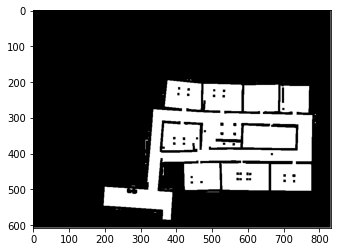

In [2]:
mmap = cv2.imread('good.jpg',0)
print(mmap.shape)
plt.imshow(mmap,cmap='gray')

(597, 597)


True

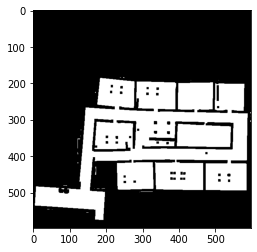

In [3]:
square_map = mmap[10:-1, 192:789]
print(square_map.shape)

plt.imshow(square_map,cmap='gray')
cv2.imwrite('square.jpg',square_map)

### DQN grid world
Given the simplified map image 'simplified_map.png', we need to transform it into 1 and 0 arrays. This function 

could read into the image version of simplified map and convert it to 1 and 0 arrays.

Text(0.5, 1.0, 'DQN Map')

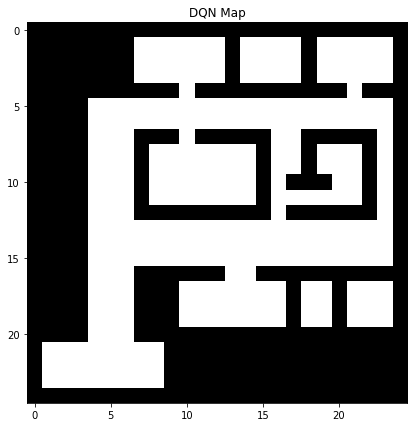

In [48]:
grid_ = cv2.imread('simplified_map.png',0)
row_step, col_step = np.ceil(np.array(grid_.shape)/25).astype(int)

DQN_map = np.zeros((25,25))
for row in range(25):
    for col in range(25):
        row_idx = int(row_step/2 + row * row_step)
        col_idx = int(col_step/2 + col * col_step)
        if grid_[row_idx, col_idx] == 255:
            DQN_map[row, col] = 1

plt.figure(figsize=(7,7))
plt.imshow(DQN_map,cmap='gray')
plt.title('DQN Map')